Laboratorio 4

Práctica 2

Autores: Raúl Jiménez Juárez 
         Beatriz Magán Pinto 
         David Alonso Rodríguez Lepina 
         Andrés Felipe Sánchez Patarroyo
         
Asignatura: Aprendizaje estadístico & Data Mining

Fecha: 23 de noviembre de 2019

Objetivo: La misma empresa quiere encontrar una manera optima de ordenar las cervezas para que los clientes puedan hacer unas búsquedas más eficientes en la tienda online. Para ello dispone de un set de datos de cervezas. Aplica un algoritmo de manera que se obtengan dichos grupos.

In [37]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

## Cargamos y preprocesamos los datos

In [2]:
#Cargamos el csv con los datos Consumo_cerveza.csv y lo guardamos en la variable df_consumo_cerva
df_cervezas = pd.read_excel("cervezas.xlsx")

#Eliminamos las filas con campos sin información. 
df_cervezas = df_cervezas.dropna()
print(df_cervezas.head())

   index  beer/ABV  beer/beerId  beer/brewerId                  beer/name  \
0  40163       5.0        46634          14338                   Chiostro   
1   8135      11.0         3003            395   Bearded Pat's Barleywine   
2  10529       4.7          961            365       Naughty Nellie's Ale   
3  44610       4.4          429              1            Pilsner Urquell   
4  37062       4.4         4904           1417  Black Sheep Ale (Special)   

                beer/style  review/appearance  review/aroma  review/overall  \
0     Herbed / Spiced Beer                4.0           4.0             4.0   
1      American Barleywine                4.0           3.5             3.5   
2  American Pale Ale (APA)                3.5           4.0             3.5   
3           Czech Pilsener                3.0           3.0             2.5   
4         English Pale Ale                4.0           3.0             3.0   

   review/palate  review/taste  
0            4.0           4.

### Usamos el algoritmo de k-means porque: 
Sirve para clústering particional. Cada clúster está asociado con un centroide (valor de la media del clúster). Cada punto es asignado al clúster más cercano al centroide. El número de clústers “K” debe ser especificado. 
El número de clústeres será el número de tipos de cerveza que obtendremos con el método unique() aplicado a la columna del dataframe relativa al tipo de cerveza. 

In [3]:
#1º: Realiza todo el preprocesamiento que sea necesario para adaptar las variables que no sean unívocas del dataset 
#y poder usar el algoritmo adecuado.
df_cervezas = df_cervezas.drop(columns = ["index", "beer/beerId", "beer/brewerId"])

In [35]:
#2º: Utiliza varias configuraciones teniendo en cuenta el número de grupos que se creará y cambiando cómo se mide la 
#distancia entre individuos. Crea una tabla donde se incluya toda la información y el número necesario de iteraciones 
#para llegar a dicha solución. Se considera la mejor solución aquella que necesite menos iteraciones. 

numero_clusteres = len(df_cervezas["beer/style"].unique())
print("El número de clústeres en nuestro algoritmo, es decir, tipos de cerveza es: \n", numero_clusteres)

datos_variableX = df_cervezas.drop(columns = ["beer/name", "beer/style"])
#Realizamos un split para tener un conjunto de datos para la prediccion (test)
datos_variableX_train, datos_variableX_test = train_test_split(datos_variableX, test_size=0.2, random_state=42)

clusters = 5
tabla_configuraciones = pd.DataFrame({"k": [],
                                     "MaxIters": [],
                                     "Resultado distancia": [],
                                     "Algoritmo" : []})
while clusters <= 95:
    iteraciones = 10
    while iteraciones <= 1000:
        
        modelo_kmeans = KMeans(n_clusters= clusters , random_state=0, max_iter=iteraciones, algorithm = "full").fit(datos_variableX)
        resultado = pd.DataFrame({"k": [clusters],
                                  "MaxIters": [iteraciones],
                                  "Resultado distancia": [modelo_kmeans.inertia_],
                                  "Algoritmo": ["full"]})
        
        tabla_configuraciones = tabla_configuraciones.append(resultado)
        tabla_configuraciones =  tabla_configuraciones.reset_index(drop=True)
        
        modelo_kmeans = KMeans(n_clusters= clusters , random_state=0, max_iter=iteraciones, algorithm = "elkan").fit(datos_variableX)
        resultado = pd.DataFrame({"k": [clusters],
                                  "MaxIters": [iteraciones],
                                  "Resultado distancia": [modelo_kmeans.inertia_],
                                  "Algoritmo": ["elkan"]})
        
        tabla_configuraciones = tabla_configuraciones.append(resultado)
        tabla_configuraciones =  tabla_configuraciones.reset_index(drop=True)
        print("Las etiquetas del algoritmo k-means es: \n ", modelo_kmeans.labels_)
        print("El número de centroides es: \n", len(modelo_kmeans.cluster_centers_))
        print("Los centroides son: \n", modelo_kmeans.cluster_centers_)
        iteraciones += 100
        
    clusters += 10

#Realizamos la predicción con el conjunto de datos de validación. 
prediccion_modelo = modelo_kmeans.predict(datos_variableX_test)
print("La predicción de nuestro modelo es: \n", prediccion_modelo)

El número de clústeres en nuestro algoritmo, es decir, tipos de cerveza es: 
 95
Las etiquetas del algoritmo k-means es: 
  [0 0 0 ... 0 0 0]
El número de centroides es: 
 1
Los centroides son: 
 [[7.4037248  3.90005333 3.87324    3.88944    3.85486667 3.92244   ]]
Las etiquetas del algoritmo k-means es: 
  [0 0 0 ... 0 0 0]
El número de centroides es: 
 1
Los centroides son: 
 [[7.4037248  3.90005333 3.87324    3.88944    3.85486667 3.92244   ]]
Las etiquetas del algoritmo k-means es: 
  [0 0 0 ... 0 0 0]
El número de centroides es: 
 1
Los centroides son: 
 [[7.4037248  3.90005333 3.87324    3.88944    3.85486667 3.92244   ]]
Las etiquetas del algoritmo k-means es: 
  [0 0 0 ... 0 0 0]
El número de centroides es: 
 1
Los centroides son: 
 [[7.4037248  3.90005333 3.87324    3.88944    3.85486667 3.92244   ]]
Las etiquetas del algoritmo k-means es: 
  [0 0 0 ... 0 0 0]
El número de centroides es: 
 1
Los centroides son: 
 [[7.4037248  3.90005333 3.87324    3.88944    3.85486667 3.92244

Las etiquetas del algoritmo k-means es: 
  [3 0 1 ... 3 0 2]
El número de centroides es: 
 4
Los centroides son: 
 [[11.05286402  4.16446756  4.28306427  4.13016144  4.24518783  4.34034461]
 [ 5.12031458  3.31146379  3.03082046  3.09324075  3.04895848  2.99433187]
 [ 8.76488935  4.0122491   4.04729799  3.98018528  4.00447761  4.0882141 ]
 [ 5.96053269  3.99527509  3.98621028  4.11248775  3.9752205   4.07972841]]
Las etiquetas del algoritmo k-means es: 
  [3 0 1 ... 3 0 2]
El número de centroides es: 
 4
Los centroides son: 
 [[11.05286402  4.16446756  4.28306427  4.13016144  4.24518783  4.34034461]
 [ 5.12031458  3.31146379  3.03082046  3.09324075  3.04895848  2.99433187]
 [ 8.76488935  4.0122491   4.04729799  3.98018528  4.00447761  4.0882141 ]
 [ 5.96053269  3.99527509  3.98621028  4.11248775  3.9752205   4.07972841]]
Las etiquetas del algoritmo k-means es: 
  [3 0 1 ... 3 0 2]
El número de centroides es: 
 4
Los centroides son: 
 [[11.05286402  4.16446756  4.28306427  4.13016144  4.

#### Interpretación de los arrays obtenidos (etiquetas de k-means y centroides): 
Si definimos que el número de clústeres son el número de tipos de cerveza (95), obtendremos 95 clústeres y 95 centroides. Los 95 centroides serán una lista de arrays en los cuales, se almacenan 6 valores diferentes de tipo float que hacen referencia a la posición del centroide de cada una de las variables que estamos estudiando (ABV, appearance, aroma, overall, palate y taste). 

El valor del array de la predicción para el conjunto de entrenamiento significa que el primer elemento del 20% de los datos que conforman el conjunto de validación, pertenece al clúster 20, el segundo al clúster 44 etc. 

In [36]:
pd.options.display.max_rows = 999
print(tabla_configuraciones)
#tabla_configuraciones.to_csv(index=False)

      k  MaxIters  Resultado distancia Algoritmo
0   1.0      10.0        286280.785567      full
1   1.0      10.0        286280.785567     elkan
2   1.0     110.0        286280.785567      full
3   1.0     110.0        286280.785567     elkan
4   1.0     210.0        286280.785567      full
5   1.0     210.0        286280.785567     elkan
6   1.0     310.0        286280.785567      full
7   1.0     310.0        286280.785567     elkan
8   1.0     410.0        286280.785567      full
9   1.0     410.0        286280.785567     elkan
10  1.0     510.0        286280.785567      full
11  1.0     510.0        286280.785567     elkan
12  1.0     610.0        286280.785567      full
13  1.0     610.0        286280.785567     elkan
14  1.0     710.0        286280.785567      full
15  1.0     710.0        286280.785567     elkan
16  1.0     810.0        286280.785567      full
17  1.0     810.0        286280.785567     elkan
18  1.0     910.0        286280.785567      full
19  1.0     910.0   

## Interpretación de la tabla de configuraciones:
Observamos que la distancia (error) se mantiene constante independientemente del número de iteraciones si se
mantiene el número de clusters constante. Sin embargo, observamos que el menor error aparece a mayor número de 
clusteres. 
Hemos observado que a mayor número de clústeres, menor distancia al clúster más cercano. 
Esto significa que cuanto mayor número de clústeres, mejores resultados. 
Por tanto, la mejor configuración es aquella en la que las siguientes variables toman estos valores: 

numero_clusteres (k) = 95, 
número de iteraciones = 10

In [21]:
#puntuacion_modelo = modelo_kmeans.score(datos_variableX_test)
#print("la puntuación del modelo es:\n", puntuacion_modelo)
#print("Distancia del modelo (error cuadrático de los clústeres): \n", modelo_kmeans.inertia_ )

la puntuación del modelo es:
 -10234.47622404793
Distancia del modelo (error cuadrático de los clústeres): 
 51611.952114991465


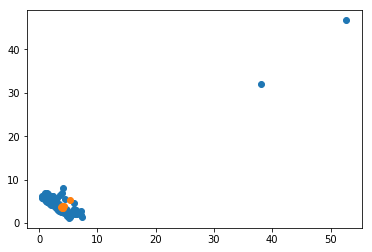

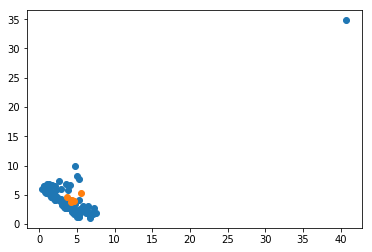

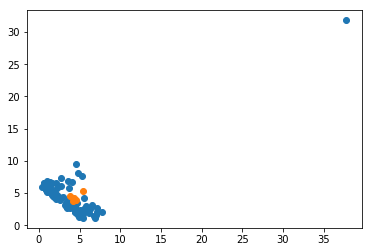

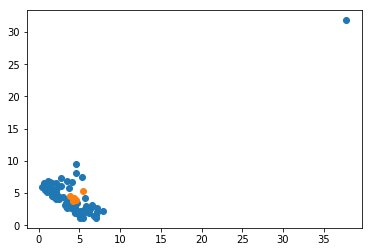

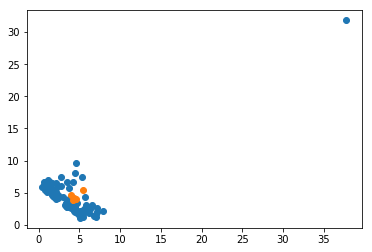

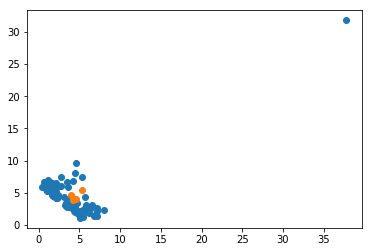

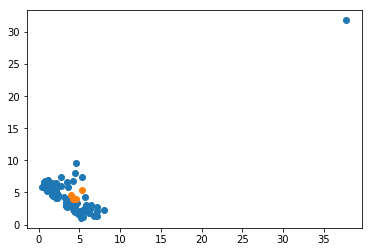

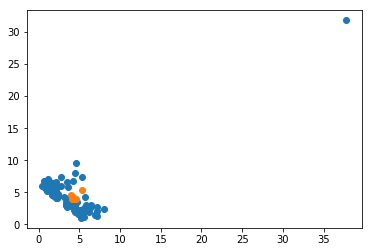

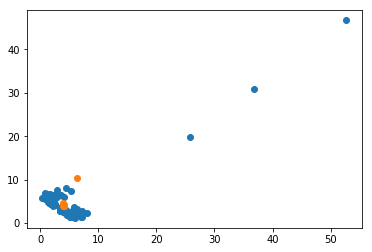

In [40]:
#3º: Con la mejor configuración del punto anterior. Utiliza dos criterios para elegir el lugar inicial del punto 
#central de los grupos. Dibuja cómo se van modificando los grupos y cómo van cambiando sus centroides en cada 
#iteración. Obtén una conclusión acerca de donde deberían situarse los centroides. 

#La mejor configuración obtenida en el punto anterior es la siguiente: 

#El primer criterio para la posición inicial del centroide será posición aleatoria.
i = 1
while i < 10:
    modelo1_kmeans = KMeans(n_clusters= 95 , random_state=0, max_iter=i, algorithm = "elkan", init = "random").fit(datos_variableX)
    datos_grafica = modelo1_kmeans.transform(datos_variableX)
    centroides = modelo1_kmeans.cluster_centers_
    plt.scatter(datos_grafica[:][0], datos_grafica[:][1])
    plt.scatter(centroides[:][0], centroides[:][1])
    plt.show()
    plt.close()
    i+=1



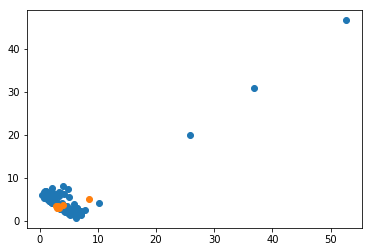

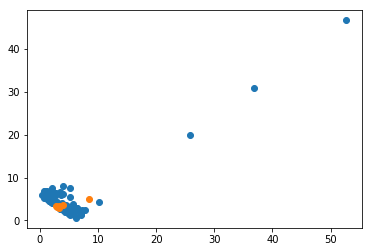

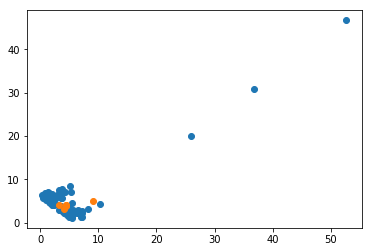

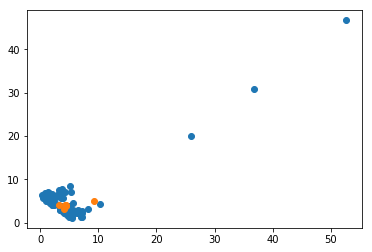

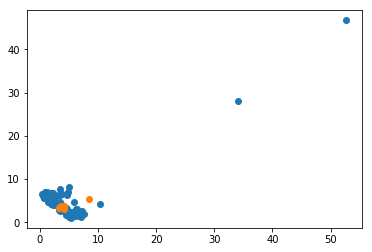

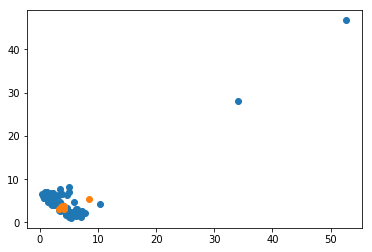

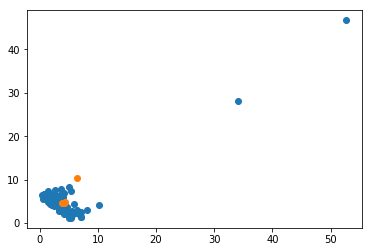

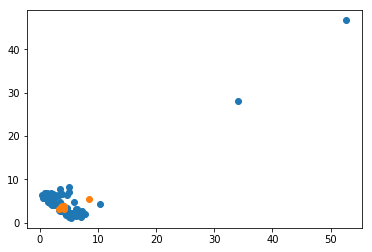

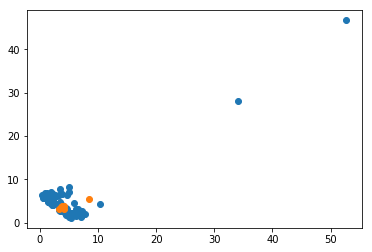

In [41]:

#El segundo criterio será elegir será k-means++
i = 1
while i < 10:
    modelo1_kmeans = KMeans(n_clusters= 95 , random_state=0, max_iter=i, algorithm = "elkan", init = "k-means++").fit(datos_variableX)
    datos_grafica = modelo1_kmeans.transform(datos_variableX)
    centroides = modelo1_kmeans.cluster_centers_
    plt.scatter(datos_grafica[:][0], datos_grafica[:][1])
    plt.scatter(centroides[:][0], centroides[:][1])
    plt.show()
    plt.close()
    i+=1




### 4º: Estudia que técnicas de postprocesamiento se podrían aplicar en base al error cometido en cada clúster. 

-Eliminar los clústeres de posibles datos atípicos. 

-Dividir clústeres dudosos con alto SSE.

-Mezclar clústeres cercanos con un bajo SSE.

-A veces se pueden añadir estos procesos dentro del procesamiento básico de clústering.